In [1]:
library('tidymodels')

── Attaching packages ─────────────────────────────────────────────────────────────────────────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ recipes      1.0.9
✔ dials        1.2.0     ✔ rsample      1.2.0
✔ dplyr        1.1.4     ✔ tibble       3.2.1
✔ ggplot2      3.4.4     ✔ tidyr        1.3.1
✔ infer        1.0.5     ✔ tune         1.1.2
✔ modeldata    1.3.0     ✔ workflows    1.1.3
✔ parsnip      1.1.1     ✔ workflowsets 1.0.1
✔ purrr        1.0.2     ✔ yardstick    1.3.0

── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()
• Use tidymodels_prefer() to resolve common conflicts.



In [2]:
fake_data = readr::read_csv('fake-data.csv', col_types = readr::cols())

fake_data |> head()

x,y,z
<dbl>,<dbl>,<chr>
117.02163,81.67360,a
41.85875,30.67836,a
73.20393,76.48622,a
85.07756,48.33911,a
127.00044,43.30345,a
45.61696,73.67332,a


`geom_smooth()` using formula = 'y ~ x'


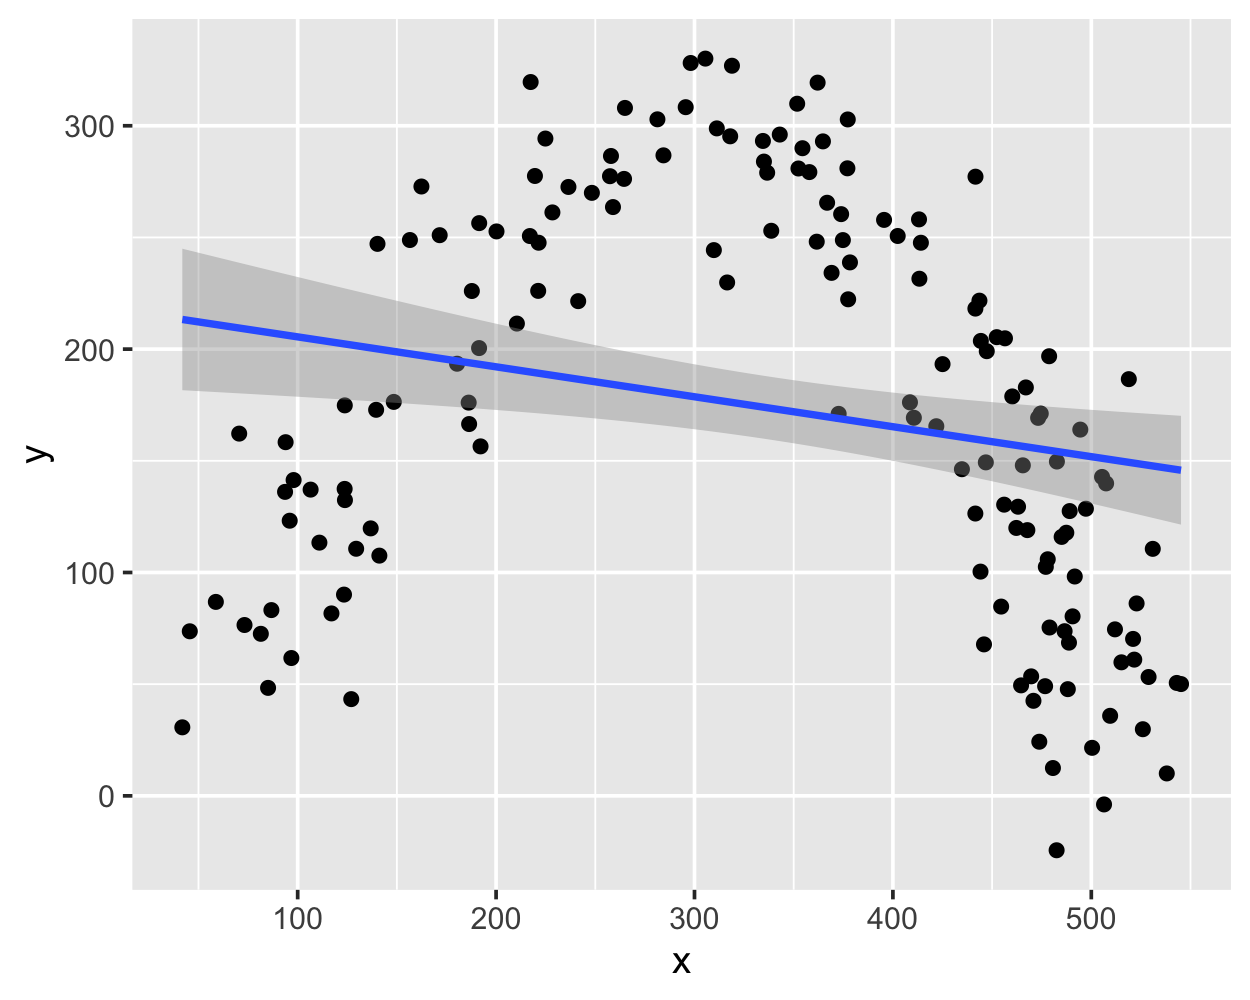

In [3]:
ggplot(fake_data, aes(y = y, x = x)) +
    geom_point() +
    stat_smooth(method = "lm")

In [4]:
rec = recipe(y ~ x, data = fake_data) |>
    step_poly(x, degree = 2, options = c(raw = TRUE)) |>
    prep()

rec |> juice() |> bind_cols(fake_data |> select(x)) |> head()

Warning message in opts$degree <- x$degree:
“Coercing LHS to a list”


y,x_poly_1,x_poly_2,x
<dbl>,<dbl>,<dbl>,<dbl>
81.67360,117.02163,13694.062,117.02163
30.67836,41.85875,1752.155,41.85875
76.48622,73.20393,5358.816,73.20393
48.33911,85.07756,7238.191,85.07756
43.30345,127.00044,16129.111,127.00044
73.67332,45.61696,2080.907,45.61696


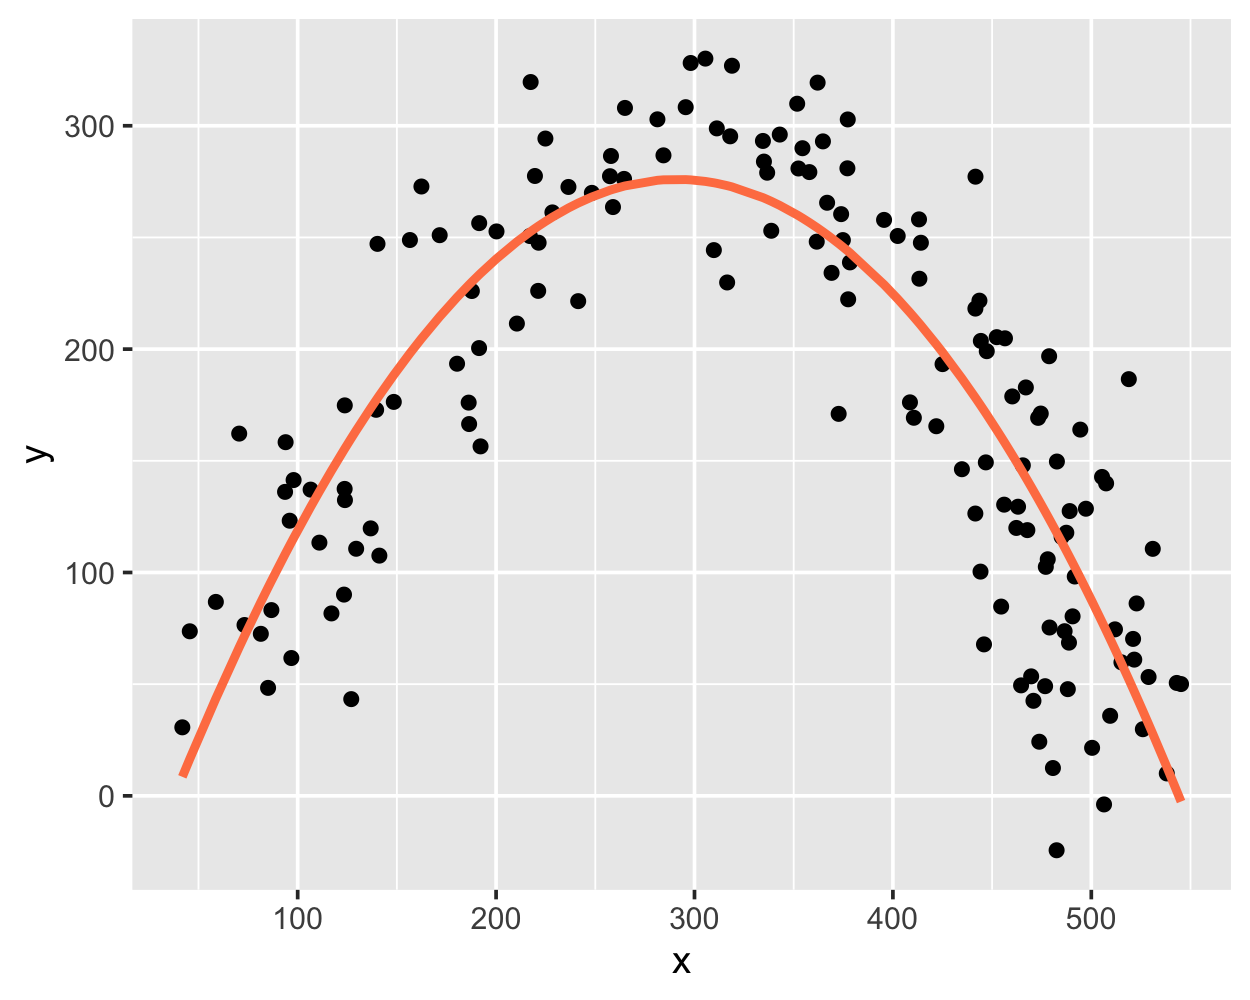

In [5]:
mod = linear_reg() |> set_engine('lm')

mod_fit = mod |> fit(y ~ ., data = rec |> juice())

predict(mod_fit, rec |> juice()) |> 
    bind_cols(fake_data) |>
ggplot(aes(x = x, y = y)) +
    geom_point() +
    geom_line(aes(y = .pred), linewidth = 1.2, color = 'coral')